# DAY 1

# Machine Learning

### Load the data

In [ ]:
import numpy as np # for numerical operations
import os # for operating system commands
import cv2 # to load images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/RoboDroid/Digits.zip'

Streaming output truncated to the last 5000 lines.
 extracting: Digits/5/img006-00085.png  
 extracting: Digits/5/img006-00086.png  
 extracting: Digits/5/img006-00087.png  
 extracting: Digits/5/img006-00088.png  
 extracting: Digits/5/img006-00089.png  
 extracting: Digits/5/img006-00090.png  
 extracting: Digits/5/img006-00091.png  
 extracting: Digits/5/img006-00092.png  
 extracting: Digits/5/img006-00093.png  
 extracting: Digits/5/img006-00094.png  
 extracting: Digits/5/img006-00095.png  
 extracting: Digits/5/img006-00096.png  
 extracting: Digits/5/img006-00097.png  
 extracting: Digits/5/img006-00098.png  
 extracting: Digits/5/img006-00099.png  
 extracting: Digits/5/img006-00100.png  
 extracting: Digits/5/img006-00101.png  
 extracting: Digits/5/img006-00102.png  
 extracting: Digits/5/img006-00103.png  
 extracting: Digits/5/img006-00104.png  
 extracting: Digits/5/img006-00105.png  
 extracting: Digits/5/img006-00106.png  
 extracting: Digits/5/img006-00107.png  
 extra

In [ ]:
#Loading the data 
# Data source: http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/

data = os.listdir(r"Digits") # returns the names of folders(1, 2, 3, ...) inside Digits
data_X = []
data_y = []
data_classes = len(data)
# first loop to select digit, second to select particular image
for i in range (0, data_classes):
    # data_list is the list of images in a digit's subfolder. 
    # Ex: Digits/0/img010-00001.png is an element in data_list
    data_list = os.listdir(r"Digits" +"/"+str(i))
    for j in data_list:
        # Read image, resize it append it to data_X(numpy array) add its label to data_y
        pic = cv2.imread(r"Digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

# print the total number of pictures in dataset
if len(data_X) == len(data_y) :
    print("Total Pictures = ",len(data_X))

# Convert images and labels to numpy arrays
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Pictures =  10160


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Spliting the data into train, validation and test sets
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05, random_state=42)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2, random_state=42)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [ ]:
from google.colab.patches import cv2_imshow

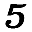

In [ ]:
cv2_imshow(test_X[100])

In [ ]:
from tensorflow import keras # tensorflow for deep learning

In [ ]:
from keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation.

In [ ]:
# Preprocessing the images for neuralnet

def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Making image grayscale
    img = cv2.equalizeHist(img) # Histogram equalization to improve the contrast in an image
    img = img/255 # Normalizing the data
    return img

# Apply above function to training, testing and validation data
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

# Reshaping the images
# Initially, the shape is 4D (no. of images, pixels in x, pixels in y, RGB values in each pixel)
# We are changing the last value to 1 since only grayscale images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

# Augmentation to increase the dataset and generate batches
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [ ]:
from keras.utils.np_utils import to_categorical # used for one hot encoding

In [ ]:
# One hot encoding of the train, test and validation labels
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [ ]:
from tensorflow.keras.models import Sequential # Used to stack layers for the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense # Layers used in the model

In [ ]:
# Creating the Convolutional Neural Network

# Create Sequential model
model = Sequential()

# Conv2D - (filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
# dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
# kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
# used to train for images as they are 2D
# MaxPooling2D - to subsample (i.e. shrink), the input image in order to reduce 
#                the computational laod, memory usage, no. of parameters (therefore limit risk of overfitting)
# Dropout - To prevent Neural Networks from Overfitting
# Flatten - Flatten the 2D input to 1D input
# Dense - A Dense layer feeds all outputs from the previous layer to all its neurons
#         and provides the output to the next layer
# Activation functions used:
# relu
# softmax

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 nodes in final layer as 10 possible values(digits) in output

model.summary() # gives the description of model and its layers.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

In [ ]:
from tensorflow.keras.utils import plot_model

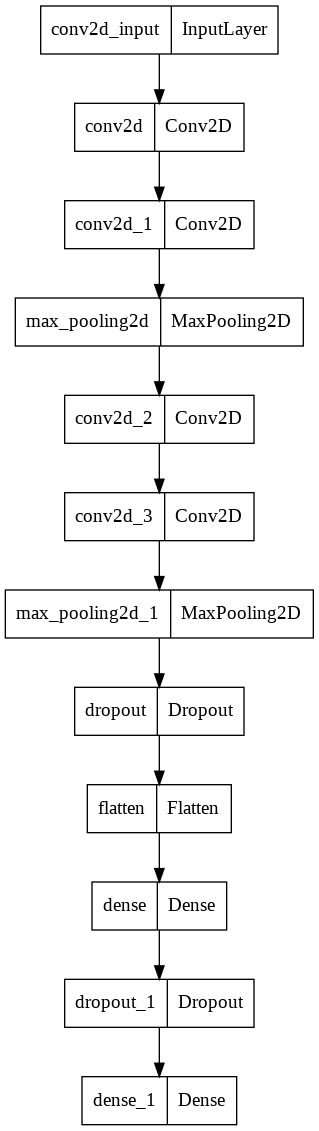

In [ ]:
plot_model(model)

### Training the model

In [ ]:
# Compiling the model
# Optimizer used:
# Adam - replacement optimization algorithm for stochastic gradient descent
# loss='categorical_crossentropy' - as classification problem
# metrics=['accuracy']
model.compile(optimizer= 'Adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model (Start training)

# Add data to model from generator and start training
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 30, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 50)

Epoch 1/30
50/50 - 12s - loss: 2.2822 - accuracy: 0.1187 - val_loss: 1.8079 - val_accuracy: 0.5111 - 12s/epoch - 249ms/step
Epoch 2/30
50/50 - 2s - loss: 1.2292 - accuracy: 0.5808 - val_loss: 0.3206 - val_accuracy: 0.9223 - 2s/epoch - 36ms/step
Epoch 3/30
50/50 - 1s - loss: 0.5634 - accuracy: 0.8263 - val_loss: 0.1308 - val_accuracy: 0.9591 - 1s/epoch - 30ms/step
Epoch 4/30
50/50 - 2s - loss: 0.3941 - accuracy: 0.8694 - val_loss: 0.1288 - val_accuracy: 0.9601 - 2s/epoch - 36ms/step
Epoch 5/30
50/50 - 2s - loss: 0.2992 - accuracy: 0.9017 - val_loss: 0.0714 - val_accuracy: 0.9751 - 2s/epoch - 32ms/step
Epoch 6/30
50/50 - 2s - loss: 0.2580 - accuracy: 0.9200 - val_loss: 0.1006 - val_accuracy: 0.9705 - 2s/epoch - 33ms/step
Epoch 7/30
50/50 - 2s - loss: 0.2174 - accuracy: 0.9362 - val_loss: 0.0839 - val_accuracy: 0.9736 - 2s/epoch - 33ms/step
Epoch 8/30
50/50 - 1s - loss: 0.2193 - accuracy: 0.9337 - val_loss: 0.0471 - val_accuracy: 0.9855 - 1s/epoch - 29ms/step
Epoch 9/30
50/50 - 2s - loss:

### Testing the model

In [ ]:
# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0) 
# returns the loss value & 
# metrics values(accuracy in our case) for the model
print('Test Loss = ',score[0])
print('Test Accuracy =', score[1])

Test Loss =  0.024455122649669647
Test Accuracy = 0.9901574850082397


### Save the model

In [ ]:
# model.save('digitRecognition.h5') #save the model to .h5 file
model.save('/content/drive/MyDrive/RoboDroid/digitRecognition.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/RoboDroid/digitRecognition.h5')

In [ ]:
test_X[100].shape

(32, 32, 1)

In [ ]:
# Randomly select image from testing dataset
img = test_X[100]

In [ ]:
from google.colab.patches import cv2_imshow

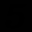

In [ ]:
cv2_imshow(img)

In [ ]:
# Multiply by 255 as we had normalized before
img *= 255

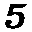

In [ ]:
cv2_imshow(img)

In [ ]:
# Normalize again
img /= 255

In [ ]:
img = np.array( [ img ] )

In [ ]:
img.shape

(1, 32, 32, 1)

In [ ]:
# Predict the image
predictions = model.predict(img)

In [ ]:
predictions

array([[5.8830826e-12, 4.2740615e-14, 5.5889487e-14, 1.1053859e-08,
        9.8911242e-14, 9.9999607e-01, 3.2668777e-06, 7.3027131e-13,
        1.3051125e-10, 7.7149991e-07]], dtype=float32)

In [ ]:
predictions = predictions.flatten()

In [ ]:
predictions

array([5.8830826e-12, 4.2740615e-14, 5.5889487e-14, 1.1053859e-08,
       9.8911242e-14, 9.9999607e-01, 3.2668777e-06, 7.3027131e-13,
       1.3051125e-10, 7.7149991e-07], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
index = [ x for x in range(0, 10)]

In [ ]:
index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

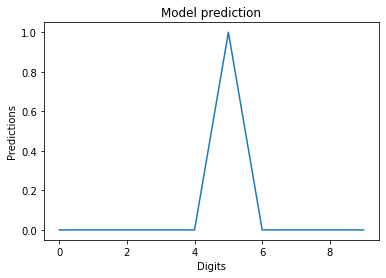

In [ ]:
# Plot the predictions
plt.plot(index, predictions)
plt.title("Model prediction")
plt.xlabel("Digits")
plt.ylabel("Predictions")
plt.show()

In [ ]:
classIndex=np.argmax(predictions)

In [ ]:
# Model's prediction
classIndex

5

In [ ]:
test_y[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Actual value
np.argmax(test_y[100])

5

# Image Processing

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

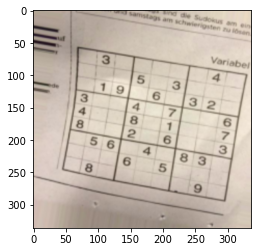

In [ ]:
# Randomly select an image from the dataset 

sudoku_a = cv2.imread("/content/drive/My Drive/RoboDroid/perspective.jpg")
plt.figure()
plt.imshow(sudoku_a)
plt.show()

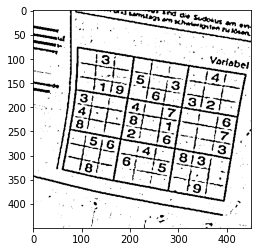

In [ ]:
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)

#let's look at what we have got
plt.figure()
plt.imshow(threshold,cmap='Greys')
plt.show()

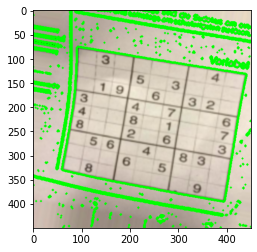

In [ ]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

In [ ]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    #top left bottom right
    add = points.sum(1)  #[1 2 3 4]
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    #top right bottom left
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


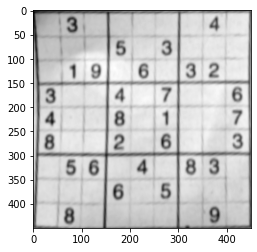

In [ ]:
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    pts1 = np.float32(biggest) #[a b c d]
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap,cmap="gray")
plt.show()

81


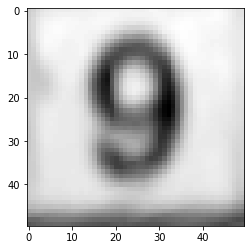

In [ ]:
boxes = splitcells(imagewrap)
print(len(boxes))
img = boxes[79]

plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

# Solve sudoku

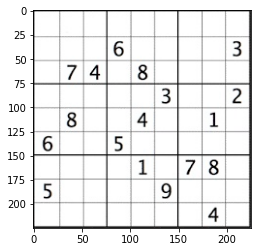

In [ ]:
# Importing puzzle to be solved
puzzle = cv2.imread('/content/drive/My Drive/RoboDroid/example.jpg')

#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()


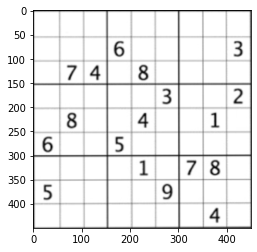

In [ ]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

su_biggest, su_maxArea = main_outline(su_contour)

if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(su_imagewrap,cmap="gray")
plt.show()

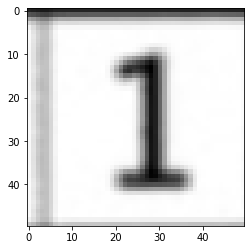

In [ ]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58],cmap="gray")
plt.show()

In [ ]:
from PIL import Image

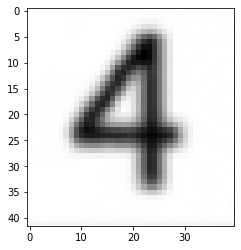

In [ ]:
# The sudoku_cell's output includes the boundaries this could lead to misclassifications by the model 

def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[79],cmap="gray")
plt.show()

# DAY 2

# ML part 2

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# model = keras.models.load_model('digitRecognition.h5')
model = load_model('/content/drive/MyDrive/RoboDroid/digitRecognition.h5')

In [ ]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65% 
        
        #predictions = model.predict(img)
        #classIndex = model.predict_classes(img)
        predictions=model.predict(img) 
        classIndex=np.argmax(predictions,axis=1)
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

In [ ]:
# Reshaping the grid to a 9x9 matrix

grid = np.reshape(grid,(9,9))
grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 3],
       [0, 7, 4, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 2],
       [0, 8, 0, 0, 4, 0, 0, 1, 0],
       [6, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 7, 8, 0],
       [5, 0, 0, 0, 0, 9, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4, 0]])

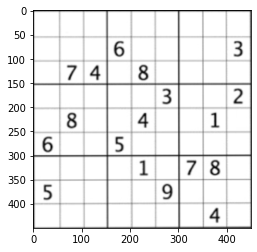

In [ ]:
#For comparing 
plt.figure()
plt.imshow(su_imagewrap, cmap="gray")
plt.show()

In [ ]:
#This function finds the next box to solve 

def next_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False

#Function to fill in the possible values by evaluating rows columns and smaller cells

def possible (quiz,row, col, n):
    #global quiz
    for i in range (0,9):
        if quiz[row][i] == n:
            return False
    for i in range (0,9):
        if quiz[i][col] == n:
            return False
        
    row0 = (row)//3
    col0 = (col)//3
    for i in range(row0*3, row0*3 + 3):
        for j in range(col0*3, col0*3 + 3):
            if quiz[i][j]==n:
                return False
    return True

#Recursion function to loop over until a valid answer is found. 

def solve(quiz):
    val = next_box(quiz)
    if val is False:
        return True
    else:
        row, col = val
        for n in range(1,10): #n is the possible solution
            if possible(quiz,row, col, n):
                quiz[row][col]=n
                if solve(quiz):
                    return True 
                else:
                    quiz[row][col]=0
        return False
    
def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("....................")

        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")

            if col == 8:
                print(quiz[row][col])
            else:
                print(str(quiz[row][col]) + " ", end="")

In [ ]:
solve(grid)

True

In [ ]:
if solve(grid):
    Solved(grid)
else:
    print("Solution don't exist or Model misread digits.")

1 2 6 | 4 3 7 | 9 5 8
8 9 5 | 6 2 1 | 4 7 3
3 7 4 | 9 8 5 | 1 2 6
....................
4 5 7 | 1 9 3 | 8 6 2
9 8 3 | 2 4 6 | 5 1 7
6 1 2 | 5 7 8 | 3 9 4
....................
2 6 9 | 3 1 4 | 7 8 5
5 4 8 | 7 6 9 | 2 3 1
7 3 1 | 8 5 2 | 6 4 9


**TF LITE MODEL**

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
import tensorflow as tf

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

NameError: ignored

In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

4329844

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 4228.363 Kilobytes


In [ ]:
KERAS_MODEL_NAME = ""